# Plotting Rain Gauge Stations Map

In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%pylab inline
from os import environ
environ['MPLBACKEND'] = 'module://gr.matplotlib.backend_gr'
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
stations=pd.read_csv('coordenadas_pluv_saisp.csv',sep=';',index_col=0)

In [4]:
stations.loc[296]

lat   -23.509027
lon   -46.705503
Name: 296, dtype: float64

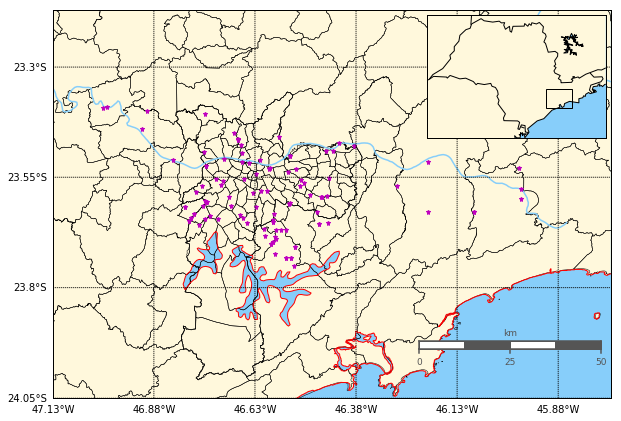

In [96]:
water = 'lightskyblue' #'aqua'
earth = 'cornsilk'# '#ddaa66'

m=Basemap(lat_0=-23.62,lon_0=-46.66,resolution='f',
            llcrnrlat=-24.05,urcrnrlat=-23.17,llcrnrlon=-47.13,urcrnrlon=-45.75,projection='merc')
fig,ax = plt.subplots()
x,y=m(stations.lon.values,stations.lat.values)
m.plot(x,y,'m*',markersize=5)
m.readshapefile('./sp/35MUE250GC_SIR','rmsp')
m.readshapefile('./sp/distritos','sp')
m.fillcontinents(color=earth,lake_color=water)
m.drawcoastlines(color='red')
meridians = np.arange(-47.13, -45.75 + 2, 0.25)
parallels = np.arange(-24.05, -23.17 + 1, 0.25)
m.drawparallels(parallels, labels=[1, 0, 0, 0])
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawrivers(color=water,linewidth=1.5)
m.drawmapboundary(fill_color=water)
m.drawmapscale(-46,-23.93,-46.66,-23.62,50,barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

m.ax=ax
axin = inset_axes(m.ax, width="32%", height="32%", loc=1)
inmap = Basemap(projection='merc', lon_0=-44.5, lat_0=-25.5,resolution='l',
            ax=axin, anchor='NE',llcrnrlat=-25.493656,urcrnrlat=-19.596852,llcrnrlon=-53.266088,urcrnrlon=-44.021747)
inmap.drawcountries(color='white')
inmap.drawmapboundary(fill_color=water)
inmap.fillcontinents(color=earth,lake_color=water)
inmap.drawstates(linewidth=1)
inmap.drawcoastlines()
#inmap.drawrivers(color='blue')
bx, by = inmap(m.boundarylons, m.boundarylats)
xy = list(zip(bx, by))
mapboundary = Polygon(xy, edgecolor='k', linewidth=1, fill=False)
inmap.ax.add_patch(mapboundary)

In [98]:
fig.savefig('mapa_estacoes.eps')
fig.savefig('mapa_estacoes.svg')

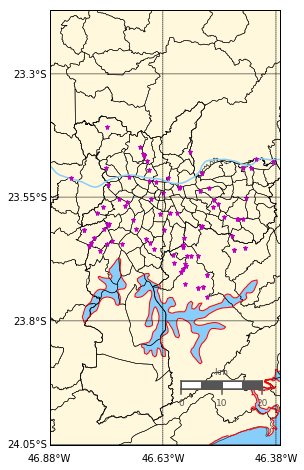

In [92]:
m=Basemap(lat_0=-23.35,lon_0=-46.66,resolution='f',
            llcrnrlat=-24.05,urcrnrlat=-23.17,llcrnrlon=-46.88,urcrnrlon=-46.37,projection='merc')
fig,ax = plt.subplots()
x,y=m(stations.lon.values,stations.lat.values)
m.plot(x,y,'m*',markersize=5)
m.readshapefile('./sp/35MUE250GC_SIR','rmsp')
m.readshapefile('./sp/distritos','sp')
m.fillcontinents(color=earth,lake_color=water)
m.drawcoastlines(color='red')
meridians = np.arange(-47.13, -45.75 + 2, 0.25)
parallels = np.arange(-24.05, -23.17 + 1, 0.25)
m.drawparallels(parallels, labels=[1, 0, 0, 0])
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawrivers(color=water,linewidth=1.5)
m.drawmapboundary(fill_color=water)
m.drawmapscale(-46.5,-23.93,-46.63,-23.55,20,barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

m.ax=ax